
<a href="https://colab.research.google.com/github/kokchun/Maskininlarning-AI21/blob/main/Exercises/E01_gradient_descent.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Gradient descent exercises

---
These are introductory exercises in Machine learning with focus in **gradient descent** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Simulate dataset (*)

Simulate datasets according to these rules:

- set random seed to 42
- (1000,2) samples from $X \sim \mathcal{U}(0,1)$ , i.e. 1000 rows, 2 columns. 
- 1000 samples from $\epsilon \sim \mathcal{N}(0,1)$
- $y = 3x_1 + 5x_2 + 3 + \epsilon$ , where $x_i$ is column $i$ of $X$

Finally add a column of ones for the intercept to $X$.

<details>

<summary>Hint</summary>

Use for simulating X

´´´
np.random.rand(samples, 2)
´´´

to concatenate with ones, use ```np.c_[..., ...]```

</details>

<details>

<summary>Answer</summary>

```
array([[1.        , 0.37454012, 0.95071431],
       [1.        , 0.73199394, 0.59865848],
       [1.        , 0.15601864, 0.15599452],
       [1.        , 0.05808361, 0.86617615],
       [1.        , 0.60111501, 0.70807258]])

```

</details>

---

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
np.random.seed(42)
X = np.random.rand(1000, 2) 
# np.random.randint() discrete uniform distribution
# np.random.rand() uniform distribution of U[0,1)
e = np.random.randn(1000,1)
X1 = np.c_[X[:,0]]
X2 = np.c_[X[:,1]]
y = 3 + 3*X1+ 5*X2 + e

ones = np.ones(1000)
X = np.c_[ones, X1, X2]

## 1. Gradient descent - learning rate (*)

Use gradient descent to calculate $\vec{\theta} = (\theta_0, \theta_1, \theta_2)^T$ 

&nbsp; a) Use $\eta = 0.1$ and simulate 500 epochs of batch gradient descent. Plot the resulting $\vec{\theta}$ values for every 5th epoch. (*)

&nbsp; b) Do the same as for a) but with learning rate $\eta = 0.01$, 5000 epochs and plot every 20 step. What do you notice when changing the learning rate? (*)

&nbsp; c) Experiment with larger and smaller $\eta$ and see what happens.

<details>

<summary>Hint</summary>

Use for simulating X

´´´
np.random.rand(samples, 2)
´´´

to concatenate with ones, use ```np.c_[..., ...]```

</details>

<details>

<summary>Answer</summary>

a) 

<img src="../assets/grad_desc_converg.png" height="200"/>

b) 

<img src="../assets/grad_desc_converg_001.png" height="200"/>

</details>

---

In [52]:
X

array([[1.        , 0.37454012, 0.95071431],
       [1.        , 0.73199394, 0.59865848],
       [1.        , 0.15601864, 0.15599452],
       ...,
       [1.        , 0.75137509, 0.65695516],
       [1.        , 0.95661462, 0.06895802],
       [1.        , 0.05705472, 0.28218707]])

In [53]:
X1

array([[0.37454012],
       [0.73199394],
       [0.15601864],
       [0.05808361],
       [0.60111501],
       [0.02058449],
       [0.83244264],
       [0.18182497],
       [0.30424224],
       [0.43194502],
       [0.61185289],
       [0.29214465],
       [0.45606998],
       [0.19967378],
       [0.59241457],
       [0.60754485],
       [0.06505159],
       [0.96563203],
       [0.30461377],
       [0.68423303],
       [0.12203823],
       [0.03438852],
       [0.25877998],
       [0.31171108],
       [0.54671028],
       [0.96958463],
       [0.93949894],
       [0.59789998],
       [0.0884925 ],
       [0.04522729],
       [0.38867729],
       [0.82873751],
       [0.28093451],
       [0.14092422],
       [0.07455064],
       [0.77224477],
       [0.00552212],
       [0.70685734],
       [0.77127035],
       [0.35846573],
       [0.86310343],
       [0.33089802],
       [0.31098232],
       [0.72960618],
       [0.88721274],
       [0.11959425],
       [0.76078505],
       [0.770

In [54]:
X2

array([[0.95071431],
       [0.59865848],
       [0.15599452],
       [0.86617615],
       [0.70807258],
       [0.96990985],
       [0.21233911],
       [0.18340451],
       [0.52475643],
       [0.29122914],
       [0.13949386],
       [0.36636184],
       [0.78517596],
       [0.51423444],
       [0.04645041],
       [0.17052412],
       [0.94888554],
       [0.80839735],
       [0.09767211],
       [0.44015249],
       [0.49517691],
       [0.9093204 ],
       [0.66252228],
       [0.52006802],
       [0.18485446],
       [0.77513282],
       [0.89482735],
       [0.92187424],
       [0.19598286],
       [0.32533033],
       [0.27134903],
       [0.35675333],
       [0.54269608],
       [0.80219698],
       [0.98688694],
       [0.19871568],
       [0.81546143],
       [0.72900717],
       [0.07404465],
       [0.11586906],
       [0.62329813],
       [0.06355835],
       [0.32518332],
       [0.63755747],
       [0.47221493],
       [0.71324479],
       [0.5612772 ],
       [0.493

In [55]:
e

array([[-8.77982587e-01],
       [-8.26880354e-01],
       [-2.26478892e-01],
       [ 3.67365507e-01],
       [ 9.13584626e-01],
       [-8.03178951e-01],
       [ 1.49268857e+00],
       [-2.71123601e-01],
       [-2.13672943e-02],
       [-7.47211679e-01],
       [-2.42424026e+00],
       [ 8.84045396e-01],
       [ 7.36843897e-01],
       [-2.81327557e-01],
       [ 6.69907172e-02],
       [ 5.15939218e-01],
       [-1.56254586e+00],
       [-5.29052677e-01],
       [ 7.94264680e-01],
       [-1.25428942e+00],
       [ 2.93557932e-01],
       [-1.35658180e+00],
       [ 4.66429982e-01],
       [-3.56414823e-02],
       [-1.61513182e+00],
       [ 1.16473935e+00],
       [-7.34591577e-01],
       [-8.10252437e-01],
       [ 2.00569197e-01],
       [ 1.14863735e+00],
       [-1.01582182e+00],
       [ 6.16798498e-02],
       [ 4.28816500e-01],
       [ 6.93105607e-01],
       [ 1.76441555e-01],
       [-3.67027839e-01],
       [-8.27590221e-01],
       [ 8.61438830e-02],
       [-1.0

In [56]:
y.shape

(1000, 1)

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# adds up to 1000
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 3), (330, 3), (670, 1), (330, 1))

In [129]:
def gradient_descent(X, y, epochs=5, learning_rate=0.1): # epoches stands for iterations
    m = len(X)

    theta = np.random.randn(X.shape[1], 1)

    for _ in range(epochs):
        gradient = 2 / m * X.T @ (X @ theta - y)
        theta -= learning_rate*gradient
    
    return theta

theta = gradient_descent(X_train, y_train)
theta.reshape(-1)

array([4.32839231, 1.0227594 , 2.00801352])

In [130]:
theta

array([[4.32839231],
       [1.0227594 ],
       [2.00801352]])

In [131]:
epochs = range(1,500)
thetas = np.array([gradient_descent(X_train, y_train, epochs=epoch).reshape(-1) for epoch in epochs])

In [61]:
thetas

array([[ 2.09702092, -1.76160163,  0.87983795],
       [ 2.61561236,  2.11751404,  0.33375739],
       [ 3.23434538,  0.80562915,  2.05137305],
       [ 3.41055465,  1.88658593,  1.5067548 ],
       [ 3.94257884,  2.59371678,  1.77463431],
       [ 4.52665819,  1.09270786,  2.34481238],
       [ 3.73310632,  4.39495255,  1.33951172],
       [ 4.42591945,  2.5977572 ,  2.22925583],
       [ 4.71477827,  2.07245019,  2.36192897],
       [ 3.65414955,  3.13529538,  3.35153904],
       [ 4.61412113,  1.70212306,  2.97211681],
       [ 3.77571447,  2.46466092,  3.89780498],
       [ 4.24125333,  2.53634681,  3.013006  ],
       [ 5.47258907,  0.79106362,  2.46675398],
       [ 4.2581642 ,  3.23625787,  2.37061314],
       [ 3.81478413,  3.45015864,  2.98601048],
       [ 4.23077056,  2.41827654,  3.23592483],
       [ 4.51592715,  1.1710273 ,  3.93284793],
       [ 4.86644342,  2.64369776,  1.86041896],
       [ 4.10541438,  2.47037239,  3.44072415],
       [ 4.68058828,  1.86193487,  2.970

In [62]:
thetas.shape

(99, 3)

In [119]:
def gradient_descent_plot(epochs, thetas):
    fig, ax = plt.figure(dpi=100), plt.axes()
    ax.plot(epochs, thetas, label = ["Intercept parameter", "Slope parameter for X1", "Slope parameter for X2"])
    ax.axhline(y=3, color='b', linestyle='--', label="True intercept")
    ax.axhline(y=3, color='orange', linestyle='--', label="True slope for X1")
    ax.axhline(y=5, color='green', linestyle='--', label="True slope for X2")
    ax.set(xlabel = "Epochs", ylabel = r"$\vec{\theta}$ - values", title="Gradient descent" )
    ax.legend();

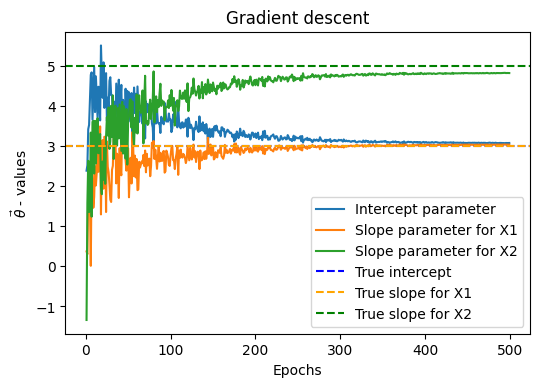

In [132]:
gradient_descent_plot(epochs, thetas)

b) Do the same as for a) but with learning rate  = 0.01, 5000 epochs and plot every 20 step.

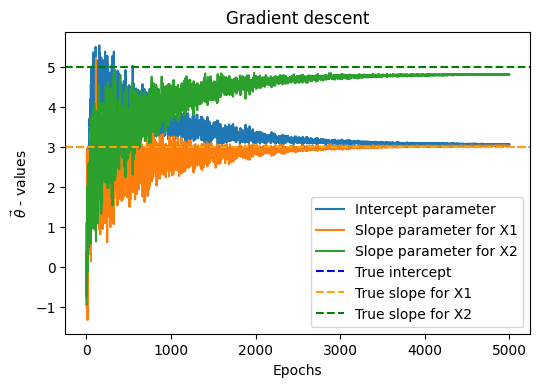

In [104]:
theta = gradient_descent(X_train, y_train, learning_rate=0.01, epochs=20)
theta.reshape(-1)

epochs = range(1,5000)
thetas = np.array([gradient_descent(X_train, y_train, learning_rate=0.01, epochs = epoch).reshape(-1) for epoch in epochs])

gradient_descent_plot(epochs, thetas)

c) Experiment with larger and smaller $\eta$ 

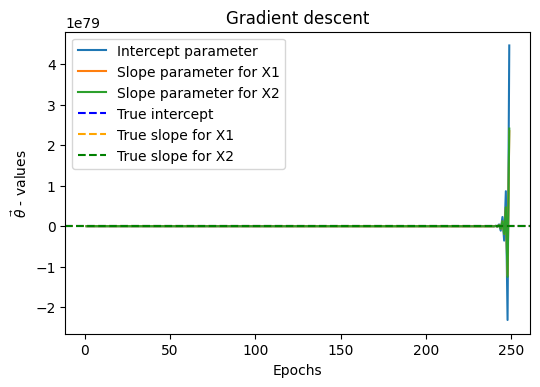

In [133]:
theta = gradient_descent(X_train, y_train, learning_rate=1, epochs=20)
theta.reshape(-1)

epochs = range(1,250)
thetas = np.array([gradient_descent(X_train, y_train, learning_rate=1, epochs = epoch).reshape(-1) for epoch in epochs])

gradient_descent_plot(epochs, thetas)

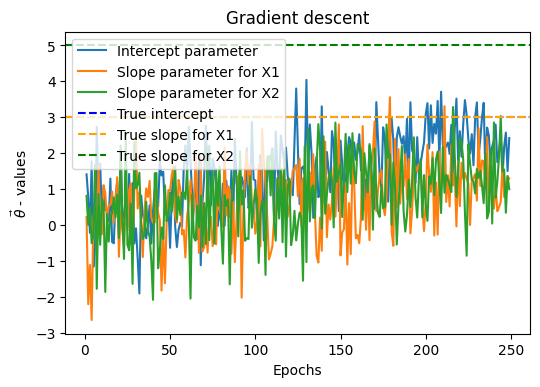

In [134]:
theta = gradient_descent(X_train, y_train, learning_rate=0.001, epochs=20)
theta.reshape(-1)

epochs = range(1,250)
thetas = np.array([gradient_descent(X_train, y_train, learning_rate=0.001, epochs = epoch).reshape(-1) for epoch in epochs])

gradient_descent_plot(epochs, thetas)

## 2. Stochastic Gradient Descent - learning rate (**)

Repeat task 1 but using stochastic gradient descent instead. Also adjust number of epochs to see if you can find convergence. What kind of conclusions can you draw from your experiments. (**)

---

In [93]:
epochs = 500
t0, t1 = 5, 50 # learning schedule parameters


def learning_rate_schedule(t):
    """"Decrease learning rate as training progresses"""
    return t0/(t+t1)

theta = np.random.randn(3,1)
m = len(X_train)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]
        gradients = 2*x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_rate_schedule(epoch*m + i)
        theta -= eta*gradients

theta


array([[3.08041834],
       [3.02226334],
       [4.80171075]])

## 3. Mini Batch Gradient Descent (**)

Now try different sizes of mini-batches and make some exploratory plots to see convergence. Also you can make comparison to the other algorithms by using same $\eta$ and same amount of epochs to see how they differ from each other in terms of convergence. (**)